In [61]:
import pandas as pd
import numpy as np

In [62]:
energy=pd.read_csv("EnergyEfficiencyData.csv")

In [63]:
energy.shape

(768, 10)

In [64]:
energy.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

You will use univariate visualization methods and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find three interesting relationships within the variables that help you understand the energy efficiency of these buildings.

In [50]:
energy.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [65]:
# replace pesky spaces in column names
energy.columns = energy.columns.str.replace(' ', '_')

In [60]:
energy.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Import the relevant libraries to visualize the data

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

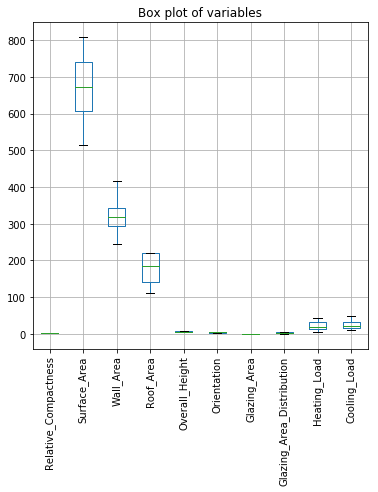

In [67]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
energy.boxplot() # Use boxplot to visualize the data
plt.xticks(rotation=90) # move to vertical axes so we can see labels
ax.set_title('Box plot of variables') # Give the plot a main title
plt.show()

Based on the plots, some variables seem to have very narrow ranges and can be treated as categorical variables. I will further use the value_counts() to check these variables. 

In [68]:
energy.loc[:,'Overall_Height'].value_counts()

3.5    384
7.0    384
Name: Overall_Height, dtype: int64

In [54]:
energy.loc[:,'Orientation'].value_counts()

5    192
4    192
3    192
2    192
Name: Orientation, dtype: int64

In [69]:
energy.loc[:,'Glazing_Area'].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: Glazing_Area, dtype: int64

In [70]:
energy["Orientation"] = energy.Orientation.astype("category")
energy["Overall_Height"] = energy.Overall_Height.astype("category")
energy["Glazing_Area"] = energy.Glazing_Area.astype("category")

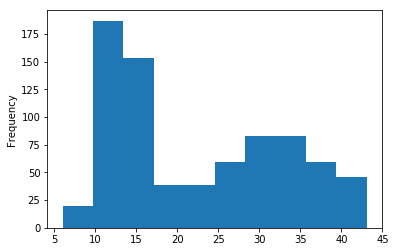

In [71]:
energy.loc[:,'Heating_Load'].plot.hist()

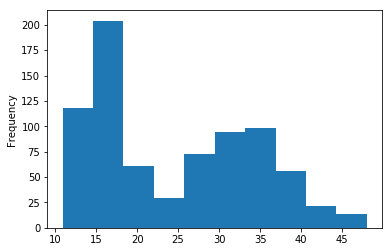

In [72]:
energy.loc[:,'Cooling_Load'].plot.hist()

Plot the correlations 

In [73]:
energy_corr=energy.corr()
energy_corr

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-0.203782,-8.688234e-01,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,0.195502,8.807195e-01,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000,-2.923165e-01,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-0.292316,1.000000e+00,-1.079129e-16,-0.861828,-0.862547
Glazing_Area_Distribution,1.764620e-17,-3.558613e-16,0.000000,-1.079129e-16,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,0.455671,-8.618283e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,0.427117,-8.625466e-01,5.052512e-02,0.975862,1.000000


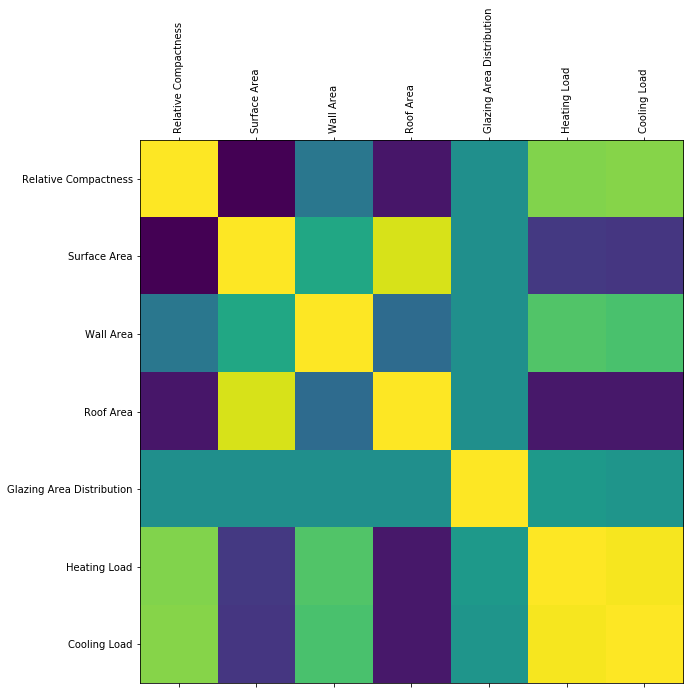

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(energy_corr)
plt.xticks(range(len(energy_corr.columns)), energy_corr.columns)
plt.yticks(range(len(energy_corr.columns)), energy_corr.columns)
plt.xticks(rotation=90)
plt.show()

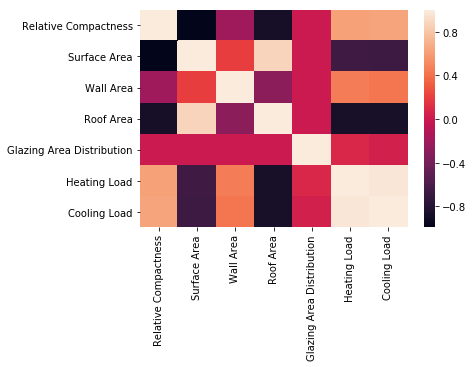

In [28]:
# A different way to plot the correlations
sns.heatmap(energy_corr, 
            xticklabels=energy_corr.columns.values,
            yticklabels=energy_corr.columns.values)

/Users/peiyun/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/peiyun/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


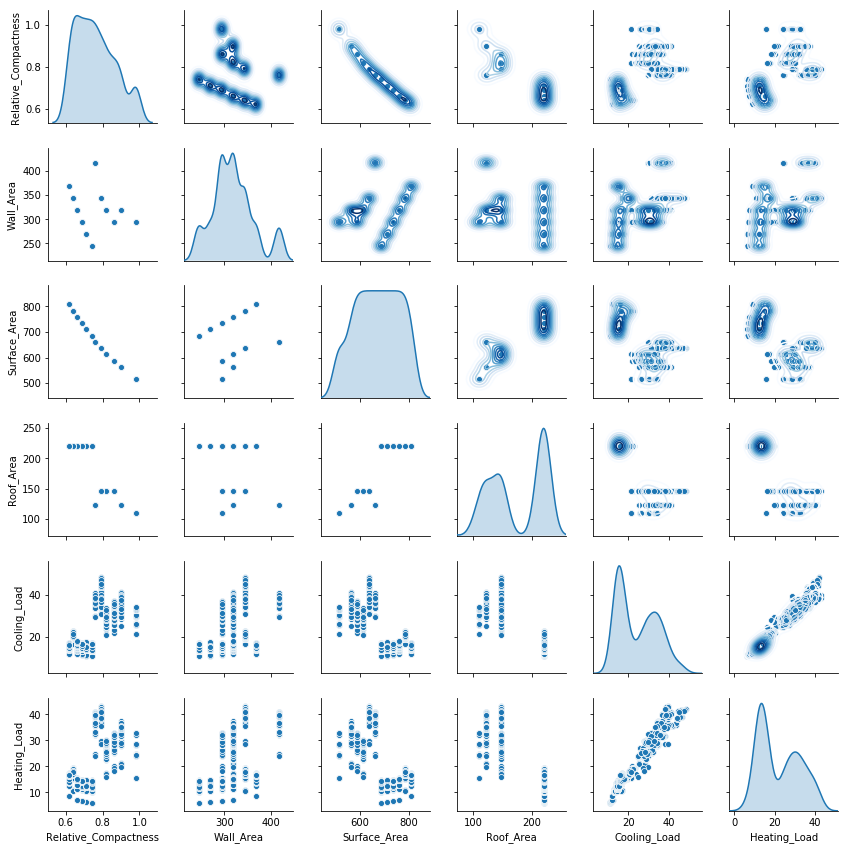

In [78]:
num_cols = ['Relative_Compactness','Wall_Area', 'Surface_Area', 'Roof_Area', 'Cooling_Load', 'Heating_Load'] 
sns.pairplot(energy.loc[:, num_cols],
             palette="seismic", diag_kind="kde", # the diagonal 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

We can also check the covariance to explore the relationships

In [80]:
energy.cov()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.118887e-02,-9.242069e+00,-0.940391,-4.150839e+00,2.386545e-17,0.664161,0.638331
Surface_Area,-9.242069e+00,7.759164e+03,751.290743,3.503937e+03,-8.135575e-14,-584.941306,-563.966469
Wall_Area,-9.403911e-01,7.512907e+02,1903.269883,-5.759896e+02,0.000000e+00,200.586323,177.267243
Roof_Area,-4.150839e+00,3.503937e+03,-575.989570,2.039963e+03,2.346088e-15,-392.763815,-370.616856
Glazing_Area_Distribution,2.386545e-17,-8.135575e-14,0.000000,2.346088e-15,2.405476e+00,1.367258,0.745486
Heating_Load,6.641607e-01,-5.849413e+02,200.586323,-3.927638e+02,1.367258e+00,101.812050,93.674064
Cooling_Load,6.383312e-01,-5.639665e+02,177.267243,-3.706169e+02,7.454857e-01,93.674064,90.502983


Based on the statistical results and plots, I found that Roof Area is highly correlated with Cooling and Heating loads. Other variables, such as wall area, surface area, also related to the heating and cooling loads. 